# Assignment 8 - Team 7

John Gullette, Rebecca Conn, Karyna Todd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [2]:
#Load the clean dataset
data = pd.read_csv('cars_cleaned.csv')
data = data.dropna()

## 2.1 Regression

### 2.1.1 Find four features which have high Pearson's correlation coefficients with Weight. Then, plot the multiple scatter charts to show relationships between Weight and these features in one figure. Briefly explain your observation in the plot.

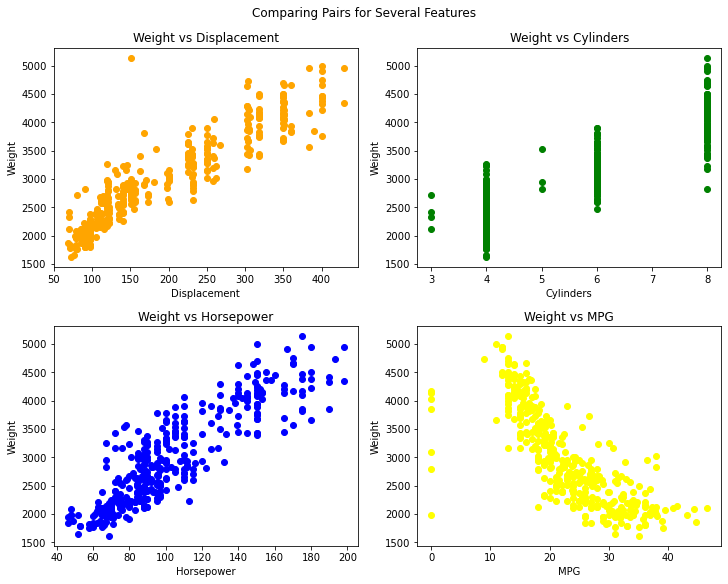

In [3]:
#Find the four features with the highest correlation coefficient with weight
df = data.corr()
df1 = abs(df['Weight']).sort_values(ascending = False)

#Make a list to store the values of the features with the highest correlation.
highest = []
i = 1

while i < 5:
    highest.append(df1.index[i])
    i += 1

#Graph the highest correlation values
fig, ([plt1, plt2], [plt3, plt4]) = plt.subplots(2, 2, figsize = (10,8), constrained_layout = True)
fig.suptitle('Comparing Pairs for Several Features')

# Highest correlation w/ weight
plt1.scatter(data[highest[0]], data.Weight, c = 'orange')
plt1.set_xlabel(str(highest[0]), fontsize = 10)
plt1.set_ylabel('Weight', fontsize = 10)
plt1.title.set_text('Weight vs ' + str(highest[0]))

#Second highest w/ weight
plt2.scatter(data[highest[1]], data.Weight, c = 'green')
plt2.set_xlabel(str(highest[1]), fontsize = 10)
plt2.set_ylabel('Weight', fontsize = 10)
plt2.title.set_text('Weight vs ' + str(highest[1]))

#Third highest w/ weight
plt3.scatter(data[highest[2]], data.Weight, c = 'blue')
plt3.set_xlabel(str(highest[2]), fontsize = 10)
plt3.set_ylabel('Weight', fontsize = 10)
plt3.title.set_text('Weight vs ' + str(highest[2]))

#Fourth highest w/ weight
plt4.scatter(data[highest[3]], data.Weight, c = 'yellow')
plt4.set_xlabel(str(highest[3]), fontsize = 10)
plt4.set_ylabel('Weight', fontsize = 10)
plt4.title.set_text('Weight vs ' + str(highest[3]))

plt.show()

From these charts we see that 3 of the top 4 correlations with Weight are positive. The only one with a negative correlation is MPG. Additionally, the curve of the plots for displacement, horsepower, and cylinders all look relatively similar and linear. The curve for MPG, however, looks like it evens out around 30 - 35 MPG. 

### 2.1.2.1 Observe the above plots and select ONLY ONE feature to build a simple LR model to predict Weight and briefly explain why you select this feature.

From these features, we select MPG because it is the most different from the other four. As stated earlier, it is the only with a negative correlation. 

### 2.1.2.2 Split the dataset into a training set (80%) and a test set (20%)

In [4]:
x = np.array(data[['MPG']].values)
y = np.array(data['Weight'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

print('Total rows: ', len(data))
print('Training rows: ', len(x_train))
print('Testing rows: ', len(x_test))

Total rows:  379
Training rows:  303
Testing rows:  76


### 2.1.2.3 Build a LR model to find details (i.e., intercept and slope) of the relationship between Weight and this feature.

In [5]:
model = LinearRegression()
clf = model.fit(x,y)
print('Coefficient: ', clf.coef_)

Coefficient:  [-79.30805045]


### 2.1.2.4 Use the test set to make prediction and print out Root Mean Squared Error (RMSE).

In [6]:
predictions = model.predict(x)
rmse = mean_squared_error(y, predictions, squared=False)
print('RMSE: ', rmse)

RMSE:  512.0553805235679


### 2.1.2.5 Plot the predicted straight line with the test data and briefly explain your observation in the plot.

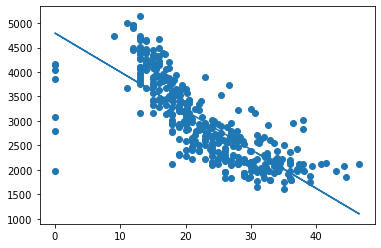

In [7]:
plt.scatter(x,y)
plt.plot(x, predictions)

## Clustering

### 2.2.1 Use K-means Clustering algorithm to find groups between Horsepower and Weight. Use number of clusters as 3. Plot clustered groups with scatter charts.

<function matplotlib.pyplot.show(close=None, block=None)>

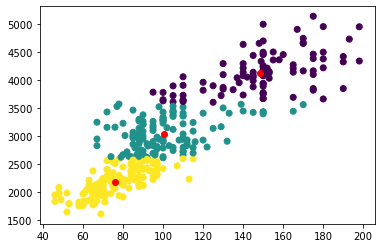

In [8]:
df = pd.DataFrame(data, columns=['Horsepower', 'Weight'])
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_

plt.scatter(df['Horsepower'],df['Weight'], c = kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show

### 2.2.2.1 Use K-means Clustering algorithm(k=4) to find groups using different numbers of the features: 

### - 'Cylinders' and 'Displacement'
### - 'Cylinders', 'Displacement', 'Weight', 'Horsepower', 'MPG' 

### Then visualize two clustered groups with scatter charts only using Cylinders and Displacement features.

<function matplotlib.pyplot.show(close=None, block=None)>

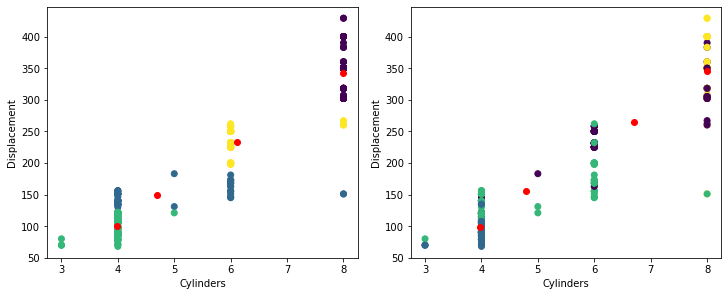

In [9]:
#Cylinders and Displacement
dfcd = pd.DataFrame(data, columns= ['Cylinders', 'Displacement'])
kmeanscd = KMeans(n_clusters=4).fit(dfcd)
centroidscd = kmeanscd.cluster_centers_

#Cylinders and Horsepower
dfch = pd.DataFrame(data, columns= ['Cylinders','Displacement', 'Horsepower', 'Weight', 'MPG'])
kmeansch = KMeans(n_clusters=4).fit(dfch)
centroidsch = kmeansch.cluster_centers_

#Plot the charts
fig, (plt1, plt2) = plt.subplots(1, 2, figsize = (10,4), constrained_layout = True)

plt1.scatter(dfcd['Cylinders'],dfcd['Displacement'], c = kmeanscd.labels_.astype(float))
plt1.scatter(centroidscd[:, 0], centroidscd[:, 1], c='red')
plt1.set_xlabel('Cylinders', fontsize = 10)
plt1.set_ylabel('Displacement', fontsize = 10)

plt2.scatter(dfch['Cylinders'], dfch['Displacement'], c = kmeansch.labels_.astype(float))
plt2.scatter(centroidsch[:,0], centroidsch[:,1], c='red')
plt2.set_xlabel('Cylinders', fontsize = 10)
plt2.set_ylabel('Displacement', fontsize = 10)

plt.show

### 2.2.2 Observe the above plots and compare each other. Explain how each plot is different from other in terms of cylinders representing those groups.

The first plot has groups cleanly separated around the y-axis whereas the second plot has greater overlap between each group. Therefore, there are more groups that share a cylinder count than in the first plot.

## 2.3 Classification

### 2.3.1.1 Use KNN Classifier to classify ‘Origin’ with all numeric features. Print the model accuracy score and confusion matrix.

In [10]:
x = np.array(data.iloc[:, 1:8])
y = np.array(data['Origin'])

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

#KNN Classifying
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('\n Model Accuracy Score: ', accuracy_score(y_test, pred))
print('\n \n Confusion Matrix')
print('\n', confusion_matrix(y_test, pred))


 Model Accuracy Score:  0.6447368421052632

 
 Confusion Matrix

 [[ 6  3  3]
 [ 4  4  8]
 [ 4  5 39]]


### 2.3.1.2 Observe the correlation matrix. Remove some features with high correlations (> around 0.9, e.g., Cylinders, weight) to Displacement and then apply KNN classifier to classify ‘Origin’ with the rest of numeric features. Print the model accuracy score and confusion matrix.

In [11]:
selected_features = ['MPG', 'Displacement', 'Horsepower', 'Acceleration', 'Model']
x = np.array(data[selected_features])

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

#KNN Classifying
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('\n Model Accuracy Score: ', accuracy_score(y_test, pred))
print('\n \n Confusion Matrix')
print('\n', confusion_matrix(y_test, pred))


 Model Accuracy Score:  0.8157894736842105

 
 Confusion Matrix

 [[ 8  3  3]
 [ 2 13  0]
 [ 3  3 41]]


### 2.3.1.3  Compare two metrics for 2.3.1.1 and 2.3.1.2. What can you find? Please explain.

The model accuracy is greater when the features with high correlations to displacement are removed. In particular, there is an increase in prediction of the 2nd origin type. The 1st and 3rd types, however, remained comparable. From this comparison, we learn that features that correlate highly with displacement are not unique to the origin of the car.

### 2.3.2.1 Use KNN Classifier to classify ‘Cylinders’ with all numeric features. Print the model accuracy score and confusion matrix.

In [12]:
selected_features = ['MPG', 'Displacement', 'Horsepower', 'Acceleration', 'Model', 'Weight']
x = np.array(data[selected_features])
y = np.array(data['Cylinders'])

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

#KNN Classifying
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('\n Model Accuracy Score: ', accuracy_score(y_test, pred))
print('\n \n Confusion Matrix')
print('\n', confusion_matrix(y_test, pred))


 Model Accuracy Score:  0.8947368421052632

 
 Confusion Matrix

 [[ 0  1  0  0  0]
 [ 0 34  0  2  0]
 [ 0  0  0  1  0]
 [ 0  1  0 15  1]
 [ 0  0  0  2 19]]


### 2.3.2.2 Observe the correlation matrix. Selected features with top two highest correlations with Cylinders (e.g., Displacement, Horsepower) to classify Cylinders using KNN classifier. Print the model accuracy score and confusion matrix.

In [13]:
df = data.corr()
df1 = abs(df['Cylinders']).sort_values(ascending = False)

#Make a list to store the values of the features with the highest correlation.
highest = []
i = 1

while i < 3:
    highest.append(df1.index[i])
    i += 1


x = np.array(data[highest])
y = np.array(data['Cylinders'])

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

#KNN Classifying
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('\n Features Included: ', highest)
print('\n Model Accuracy Score: ', accuracy_score(y_test, pred))
print('\n \n Confusion Matrix')
print('\n', confusion_matrix(y_test, pred))


 Features Included:  ['Displacement', 'Weight']

 Model Accuracy Score:  0.9605263157894737

 
 Confusion Matrix

 [[36  0  0]
 [ 1 16  2]
 [ 0  0 21]]


### 2.3.2.3 Selected a few features with lower correlations with Cylinders (e.g., Acceleration, Model) to classify Cylinders using KNN classifier. Print the model accuracy score and confusion matrix.

In [14]:
df = data.corr()
df1 = abs(df['Cylinders']).sort_values(ascending = True)

#Make a list to store the values of the features with the highest correlation.
lowest = []
i = 0

while i < 2:
    lowest.append(df1.index[i])
    i += 1

x = np.array(data[lowest])
y = np.array(data['Cylinders'])

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

#KNN Classifying
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('\n Features included: ', lowest)
print('\n Model Accuracy Score: ', accuracy_score(y_test, pred))
print('\n \n Confusion Matrix')
print('\n', confusion_matrix(y_test, pred))


 Features included:  ['Model', 'Acceleration']

 Model Accuracy Score:  0.5789473684210527

 
 Confusion Matrix

 [[ 0  0  0  0  1]
 [ 0 29  0  8  5]
 [ 0  1  0  0  0]
 [ 0  9  0  0  1]
 [ 0  7  0  0 15]]


### 2.3.2.4 Compare two metrics for 2.3.2.1, 2.3.2.2, and 2.3.2.3. What can you find? Please explain.

The model accuracy is greater when the features with high correlations to displacement are removed. In particular, there is an increase in prediction of the 2nd cylinder type. The 1st and 3rd types, however, remained comparable. In comparison, the features with high correlations to displacement are better at predicting the number of cylinders than those that do not. 

### 2.3.3  Compare with 2.3.1 and 2.3.2. What can you find? Please clearly explain in the notebook.

In 2.3.1, when investigating the origin, we found that the model accuracy increased when the features with high correlation to displacement were included. However, in 2.3.2, we found the opposite with regards to cylinders. Therefore, we found that the features that greatly influence predictability for the origin of the vehicle are the opposite for those that influence the predictability of cylinders.  